
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />
</p>

## Linear Regression in Python for Engineers, Data Scientists and Geoscientists 
### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### Contacts: [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [www.michaelpyrcz.com](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446)

This is a well-documented demonstration of **Linear Regression** in Python with the SciPy package, [Stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module.    

This demonstration includes basic, calculation of a linear regression model (only 1 predictor and 1 response), model visualization and checking, hypothesis testing the significance of the parameters, calculation the parameter confidence intervals and the prediction intervals.

##### My Other Resources

I have not included all the details, e.g., for the test assumptions in this document. These are the related lectures with linked Python interactive dashboards and well-documented demonstrations (like this one):

* [Bivariate Statistics](https://youtu.be/wZwYEDqB4A4)
* [Q-Q plots](https://youtu.be/RETZus4XBNM) 
* [Linear Regression](https://youtu.be/HzWq7pj2F_w) 
* [Norms](https://youtu.be/JmxGlrurQp0)

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
from sklearn.linear_model import LinearRegression           # scikit-learning multilinear regression
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
plt.rc('axes', axisbelow=True)                              # set axes and grids in the background for all plots
import math                                                 # for square root

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [2]:
#os.chdir("C:\PGE337")                                      # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [3]:
#df = pd.read_csv("Density_Por_data.csv")                    # read a .csv file in as a DataFrame
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load data from Dr. Pyrcz's GitHub repository
df.head()                                                    # we could also use this command for a table preview 

,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [4]:
df.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Density,105.0,1.737917,0.288278,0.996736,1.552713,1.748788,1.906634,2.410560
Porosity,105.0,12.531279,3.132269,4.966421,10.546483,12.411608,14.230930,20.964941


Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'X1' and 'X2' for convenience.

In [5]:
por = df['Porosity']
den = df['Density']
denv = np.linspace(1.0,2.4,100)

#### Linear Regression Model

Let's first calculate the linear regression model



In [6]:
linear = st.linregress(den,por)                     # output is the linear regression model
print('\nOutput from linregress function is ' + str(type(linear)) + ':')
print(linear)
print('\nLinear Regression Model:')
print('  Slope: ' + str(round(linear.slope,2)))
print('  Intercept: ' + str(round(linear.intercept,2)))
print('  Square Root of R-squared: ' + str(round(linear.rvalue,2)))
print('  Slope p-value: ' + str(round(linear.pvalue,2)))
print('  Slope standard error: ' + str(round(linear.stderr,2)))


Output from linregress function is <class 'scipy.stats._stats_mstats_common.LinregressResult'>:
LinregressResult(slope=-9.103894698738019, intercept=28.353094840583744, rvalue=-0.8378757673511419, pvalue=7.744611355360021e-29, stderr=0.5844011014765733, intercept_stderr=1.02938720863459)

Linear Regression Model:
  Slope: -9.1
  Intercept: 28.35
  Square Root of R-squared: -0.84
  Slope p-value: 0.0
  Slope standard error: 0.58


#### Visualize the Linear Regression Model

Now let's visualize the linear regression model with the data.

The model parameters are, slope (b1) = -9.1, and the intercept (b0) = 28.35


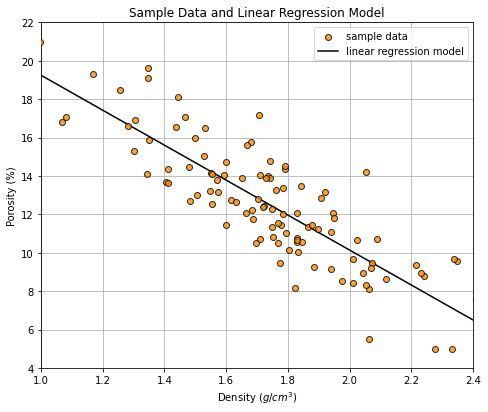

In [7]:
print('The model parameters are, slope (b1) = ' + str(round(linear.slope,2)) + ', and the intercept (b0) = ' + str(round(linear.intercept,2)))
plt.scatter(den, por, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=10)
plt.plot(denv, linear.intercept + linear.slope*denv, 'black', label='linear regression model',zorder=1)
plt.title('Sample Data and Linear Regression Model'); plt.xlabel(r'Density ($g/cm^3$)'); plt.ylabel('Porosity (%)')
plt.legend(); plt.grid(); plt.ylim([4,22]); plt.xlim([1.0,2.4])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.1, hspace=0.2); plt.show()

#### Model Confidence Intervals

Let's calculate the 95% confidence interval for the linear regression model slope parameter, $b_1$, of our model.

* we first need the $t_{critical}$ value, given $alpha = 0.05$ and $df = n-2$.

The model parameters confidence intervals at a 0.95 significance level are:
Slope: P2.5 = -10.26 , P97.5 = -7.94


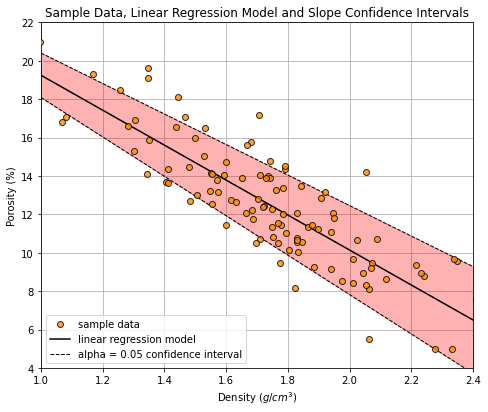

In [8]:
alpha = 0.05
tstat = st.t.ppf([alpha/2,1-alpha/2], len(por)-2)
slope_lower,slope_upper = linear.slope + tstat*linear.stderr
#intercept_lower,intercept_upper = linear.intercept + tstat*linear.intercept_stderr

print('The model parameters confidence intervals at a ' + str(1-alpha) + ' significance level are:')
print('Slope: P' + str(alpha/2*100) + ' = '+ str(round(slope_lower,2)) + ' , P' + str((1-alpha/2)*100) + ' = ' + str(round(slope_upper,2)))
#print('Intercept: ' + str(round(intercept_lower,2)) + ' , ' + str(round(intercept_upper,2)))

plt.scatter(den, por, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=10)
plt.plot(denv, linear.intercept + linear.slope*denv, 'black', label='linear regression model')
plt.plot(denv, linear.intercept + slope_upper*denv, 'black',ls='--',lw=1,label=r'alpha = ' + str(alpha) + ' confidence interval')
plt.plot(denv, linear.intercept + slope_lower*denv, 'black',ls='--',lw=1)
plt.fill_between(denv,linear.intercept + slope_upper*denv,linear.intercept + slope_lower*denv,color='red',alpha=0.3,zorder=1)
plt.title('Sample Data, Linear Regression Model and Slope Confidence Intervals'); plt.xlabel(r'Density ($g/cm^3$)'); plt.ylabel('Porosity (%)')
plt.legend(loc='lower left'); plt.grid(); plt.ylim([4,22]); plt.xlim([1.0,2.4])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.1, hspace=0.2); plt.show()

#### Model Prediction Intervals

Let's calculate the prediction intervals.

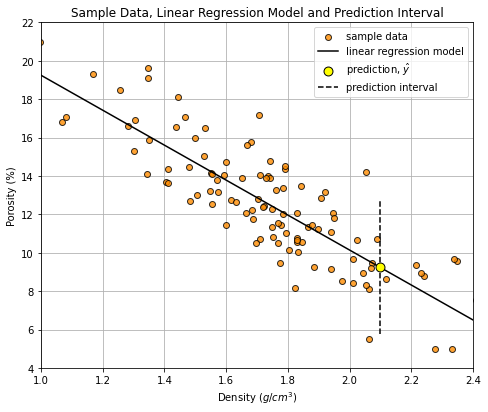

In [9]:
new_x = 2.1
alpha = 0.05

por_hat = linear.intercept + linear.slope*den
MSE = np.sum(np.power(por-por_hat,2))/(len(por)-2)
est_stderr = math.sqrt(1 + 1/len(por) + np.power(new_x - np.average(den),2)/np.sum(np.power(den-np.average(den),2)))
tstat = st.t.ppf([alpha/2,1-alpha/2], len(por)-2)

y_pred_lower, y_pred_upper = linear.intercept + linear.slope*new_x + tstat*math.sqrt(MSE)*est_stderr

plt.scatter(den, por, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=1)
plt.plot(denv, linear.intercept + linear.slope*denv, 'black', label='linear regression model',zorder=1)
plt.scatter(new_x, linear.intercept + linear.slope*new_x,s=80,color='yellow',edgecolor='black',label='prediction, $\hat{y}$',zorder=2)
plt.plot([new_x,new_x],[y_pred_lower,y_pred_upper],color='black',linestyle='dashed',zorder=1,label='prediction interval')
plt.title('Sample Data, Linear Regression Model and Prediction Interval'); plt.xlabel(r'Density ($g/cm^3$)'); plt.ylabel('Porosity (%)')
plt.legend(); plt.grid(); plt.ylim([4,22]); plt.xlim([1.0,2.4])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.1, hspace=0.2); plt.show()


#### Model Checking

Let's test the slope with the following hypothesis test:

\begin{equation}
H_0: b_{1} = 0.0
\end{equation}

\begin{equation}
H_1: b_{1} \ne 0.0
\end{equation}

and see if we can reject this hypothesis, $H_{0}$ , that the slope parameter is equal to 0.0.  If we reject this null hypothesis, we show that the slope is meaning full and there is a linear relationship between density and porosity that we can use.

Fortunately, the $linregress$ function from the $stats$ package provides us with the two sided p-value for this test.  

In [10]:
print('The linear regression model slope parameter p-value is ' + str(round(linear.pvalue,10)) + '.')

The linear regression model slope parameter p-value is 0.0.


Now let's calculate the $r^2$, proportion of variance explained. Here's the variance explained by the model:

\begin{equation}
𝑠𝑠𝑟𝑒𝑔 = \sum_{𝑖=1}^{𝑛}\left(\hat{y}_i - \overline{y}\right)^2 
\end{equation}

and the variance not explained by the model:

\begin{equation}
𝑠𝑠𝑟𝑒sid = \sum_{𝑖=1}^{𝑛}\left(y_i - \hat{y}\right)^2 
\end{equation}

Now we can calculate the variance explained as:

\begin{equation}
𝑟^2 = \frac{𝑠𝑠𝑟𝑒𝑔}{𝑠𝑠𝑟𝑒𝑔+𝑠𝑠𝑟𝑒𝑠𝑖𝑑} = \frac{\text{variance explained}}{\text{total variance}}
\end{equation}

In [20]:
r2 = linear.rvalue**2
print('The $r^2$ of the linear regression model is ' + str(round(r2,3)))

The $r^2$ of the linear regression model is 0.702


Now let's perform a f-test for the significance of all model parameters at once.

\begin{equation}
H_0: b_i = 0, \forall i
\end{equation}

\begin{equation}
H_1: otherwise
\end{equation}

To test this hypothesis we calculate the $f_{statistic}$ and $f_{critical}$ as:

\begin{equation}
f_{statistic} = \frac{\text{Mean Squares of Model}}{\text{Mean Squares of Error}}   
\end{equation}

\begin{equation}
f_{statistic} = \frac{ \frac{\sum_{𝑖=1}^{𝑛}(\hat{y}_i - \overline{y})^2}{k-1} } { \frac{\sum_{𝑖=1}^{𝑛}\left(y_i - \hat{y}\right)^2}{n-k} }
\end{equation}

and now we can calculate the $f_{critical}$ value as:

\begin{equation}
𝑓_{𝑐𝑟𝑖𝑡𝑖𝑐𝑎𝑙}  = f_{k-1,n-k}(1-𝛼)
\end{equation}

Since this is a one-tail test, if $f_{statistic} > f_{critical}$, then we reject the null hypothesis.

In [39]:
alpha = 0.05
k = 2 
ms_model = np.sum(np.power(por-np.average(por),2))/(k-1)
ms_error = np.sum(np.power(por-por_hat,2))/(len(por)-k)
f_stat = ms_model/ms_error
f_crit = st.f.ppf(1-alpha, k-1, len(por)-k)

print('The f-stat is : ' + str(round(f_stat,2)) + ' and the f-critical is : ' + str(round(f_crit,3)))

if f_stat > f_crit:
    print('Therefore we reject the null hypothesis, our model parameters are significant')


The f-stat is : 345.68 and the f-critical is : 3.933
Therefore we reject the null hypothesis, our model parameters are significant


#### Correlation Coefficient

We can also observe correlation coefficient.

* valid and useful for our linear model

In [38]:
print('The correlation coefficient is = ' + str(round(linear.rvalue,2)))

The correlation coefficient is = -0.84


#### Model Cross Validation

Let's use this model to make a prediction at all the data locations.  

* now plot a standard model cross validation plot, actual vs. predicted values for the response feature
* note, we are only looking at data used to build the model, known as training data.

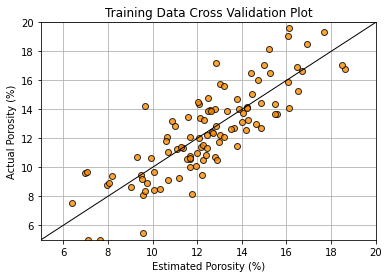

In [11]:
por_hat = linear.slope * den + linear.intercept
plt.scatter(por_hat,por,color='darkorange',alpha=0.8,edgecolor='black')
plt.plot([0,30],[0,30],color='black',linewidth=1)
plt.ylabel('Actual Porosity (%)'); plt.xlabel('Estimated Porosity (%)'); plt.title('Training Data Cross Validation Plot')
plt.xlim(5,20); plt.ylim(5,20)
plt.grid(); plt.show()

Now let's look at the distribution of estimates.

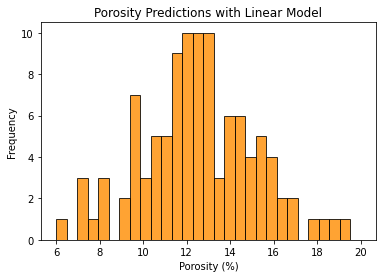

In [12]:
plt.hist(por_hat,color='darkorange',alpha=0.8,edgecolor='black',bins=np.linspace(6,20,30))
plt.title("Porosity Predictions with Linear Model")
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency')
plt.show()

It is useful to plot the predictions of porosity and porosity data vs. the density data. From this plot we can observe the linear limitation of our model and get a sense of the unexplained variance $\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} {n-1}$

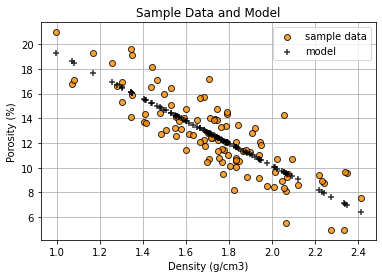

In [13]:
plt.scatter(den, por,color='black',alpha=0.8,facecolor='darkorange',label='sample data')
plt.scatter(den, por_hat,color='black',s=40,marker='+',alpha=0.8,facecolor='black',label='model')
plt.title('Sample Data and Model'); plt.xlabel('Density (g/cm3)'); plt.ylabel('Porosity (%)')
plt.legend()
plt.grid(True); plt.show()

Next let's calculate the residual and check their distribution. 

* residuals are the true values at the data locations minus the estimates at the data locations, $y_i - \hat{y}_i$.  

We want to make sure the average is close to 0.0 (unbiased estimates) and to observe the shape and spread of the residual distribution.

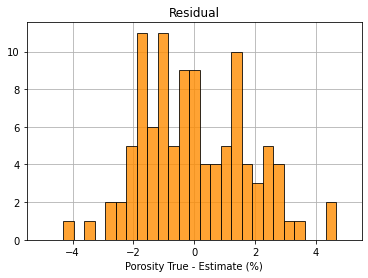

The average of the residuals is 0.0


In [14]:
residual = por - por_hat
plt.hist(residual,color='darkorange',alpha=0.8,edgecolor='black',bins=np.linspace(-5,5,30))
plt.title("Residual")
plt.xlabel('Porosity True - Estimate (%)')
plt.grid(True); plt.show()
print('The average of the residuals is ' + str(round(np.mean(residual),2)))

Next we will check the residual vs. the fitted value.  

* we want to see if the errors are consistent over the range of fitted values.  

* for example, we could use this plot to identify higher error or systematic under- or overestimation over a specific range of fitted values.

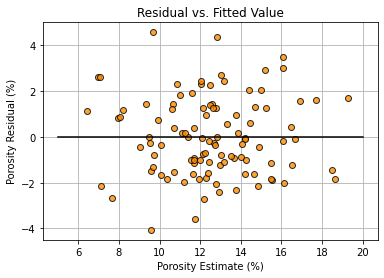

In [15]:
plt.scatter(por_hat,residual,facecolor='darkorange',alpha=0.8,color='black')
plt.title('Residual vs. Fitted Value')
plt.xlabel('Porosity Estimate (%)')
plt.ylabel('Porosity Residual (%)')
plt.plot([5,20], [0,0],'black')
plt.grid(True); plt.show()

#### Let's Rebuild the Model with scikit-learn

* scikit-learn is one of the most popular Python machine learning packages

* demonstrates the standard scikit-learn approach

1. **instantiate** - make the model object while setting the hyperparameters (none for linear regression)
2. **fit** - train the model parameters with training data (we aren't doing train and test split yet) 
3. **predict** - use the trained model to make predictions (for demonstration we just predict at the training data)

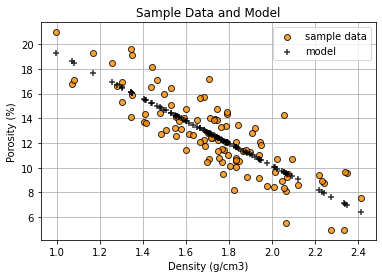

In [16]:
linear_model = LinearRegression()                           # instantiate the prediction model
linear_model.fit(den.values.reshape(-1, 1),por)             # train the model with the training data
por_hat_scikit = linear_model.predict(den.values.reshape(-1, 1)) #$ predict with the trained model

plt.scatter(den, por,color='black',alpha=0.8,facecolor='darkorange',label='sample data')
plt.scatter(den, por_hat_scikit,color='black',s=40,marker='+',alpha=0.8,facecolor='black',label='model')
plt.title('Sample Data and Model'); plt.xlabel('Density (g/cm3)'); plt.ylabel('Porosity (%)')
plt.legend()
plt.grid(True); plt.show()

#### Comments

This was a basic demonstration of linear regression in Python with the SciPy package.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
